In [3]:
from rasterio.plot import show, show_hist
from google.colab import files,drive
from IPython import display
import matplotlib.pyplot as plt
import cv2
import rasterio
import seaborn as sns
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow_io as tfio
import warnings
import pickle
import random

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from google.colab.patches import cv2_imshow
SEED = 1000
np.random.seed(SEED)
warnings.filterwarnings('ignore')
tf.random.set_seed(SEED)
tf.__version__




'2.4.1'

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')


In [5]:
# !pip install rasterio
# !pip install tensorflow_io
# !pip install pickle-mixin

[0 0 0 ... 0 0 0]
ACurracy : 0.5079365079365079
prediction is:  f_normalised


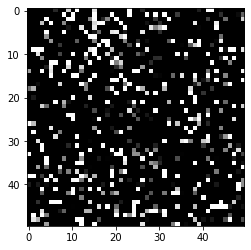

In [18]:
i=0
dir='/content/drive/MyDrive/Dataset'
newcat=['c_normalised','f_normalised']
newcat2=['cll','mcl']
newcat3=['fl','mcl']

data=[]
store=[]
store2=[]

for category in newcat:
  path=os.path.join(dir,category)
  label=newcat.index(category)
  for img in os.listdir(path):
    imgpath=os.path.join(path,img)
    dataimg=cv2.imread(imgpath,0)
    ret, bw_img = cv2.threshold(dataimg, 127, 255, cv2.THRESH_BINARY) 
    bw = cv2.threshold(dataimg, 127, 255, cv2.THRESH_BINARY) 
    bw_img=cv2.resize(bw_img,(50,50))
    image=np.array(bw_img).flatten()
    data.append([image,label])


pick=open('data1.pickle','wb')
pickle.dump(data,pick)
pick.close()

pick=open('data1.pickle','rb')
data=pickle.load(pick)
pick.close()

random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
  features.append(feature)
  labels.append(label)

xtrain,xtest,ytrain,ytest= train_test_split(features,labels,test_size=0.25)
model=SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)

pick=open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

pick=open('model.sav','rb')
model=pickle.load(pick)
pick.close()

prediction=model.predict(xtest)
accuracy=model.score(xtest,ytest)   

newcat=['c_normalised','f_normalised']
img=xtest[0].reshape(50,50)

print(xtest[0])
print("ACurracy :",accuracy)
print("prediction is: ",newcat[prediction[0]])    
plt.imshow(img,cmap='gray')
plt.show()